<a href="https://colab.research.google.com/github/showravj2-create/arima-vs-lstm-time-series-forecasting-/blob/main/02_lstm_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/international-migration-october-2025-citizenship-by-visa-and-by-country-of-last-permanent-residence.csv', index_col='year_month', parse_dates=True)
scaler = MinMaxScaler()
df['estimate'] = pd.to_numeric(df['estimate'], errors='coerce')
df.dropna(subset=['estimate'], inplace=True)
data_to_scale = df['estimate'].values.reshape(-1, 1)
data_scaled = scaler.fit_transform(data_to_scale)

In [3]:
# 2. Sequence Creation (Windowing)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12  # Use 12 months to predict the next month
X, y = create_sequences(data_scaled, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
# 3. Build and Train LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 4.0010e-04
Epoch 2/50
2778/3520 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0215e-04

KeyboardInterrupt: 

In [ ]:
# 4. Evaluation
predictions = model.predict(X_test)
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


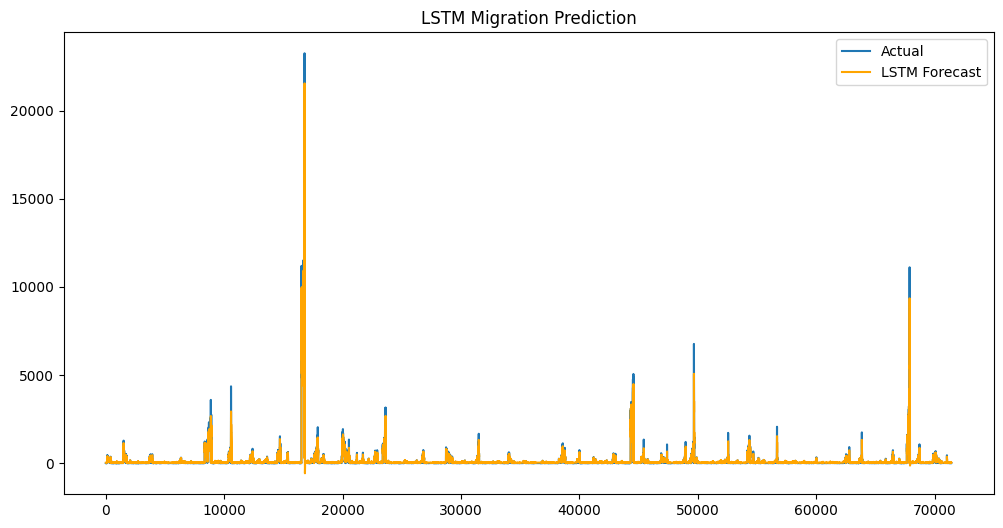

Test RMSE: 131.38


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='LSTM Forecast', color='orange')
plt.title('LSTM Migration Prediction')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test_inv, predictions_inv))
print(f'Test RMSE: {rmse:.2f}')